<a href="https://colab.research.google.com/github/Diwakarmogarala/hds5210-2023/blob/main/final/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
text = requests.get('https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD')

In [3]:
with open('data.json','w') as info:
  info.write(text.text)

In [4]:
import json
disease_json = json.load(open('data.json'))

In [13]:
column_list = []
for each_column in disease_json['meta']['view']['columns']:
  column_list.append(each_column['fieldName'].replace(':','').strip())

In [38]:
disease = pd.DataFrame(s['data'], columns=column_list)

In [16]:
pd.options.display.max_columns=50
disease.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,geolocation,responseid,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
0,row-4e8u_kb3k_ruva,00000000-0000-0000-C53E-FCF15DC98385,0,1675079585,None,1675079742,None,{ },2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,None,None,Number,30,30,None,None,None,None,Race/Ethnicity,American Indian or Alaska Native,None,None,None,None,POINT (-120.15503132599969 44.56744942400047),None,41,CVD,CVD1_4,NMBR,RACE,AIAN,None,None,None,None
1,row-8djq~36zn.35a7,00000000-0000-0000-0F96-C4CBF3FA06C0,0,1675079585,None,1675079679,None,{ },2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,29.5,29.5,None,None,24.9,34.7,Gender,Female,None,None,None,None,POINT (-111.76381127699972 34.865970280000454),None,04,ALC,ALC1_1,CRDPREV,GENDER,GENF,None,None,None,None
2,row-9xyn-jp2e.7r5u,00000000-0000-0000-BEA0-84C8EA112F1E,0,1675079585,None,1675079679,None,{ },2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,22.5,22.5,None,None,17.0,29.1,Gender,Male,None,None,None,None,POINT (-82.40426005599966 40.06021014100048),None,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,None,None,None,None
3,row-d63b_znu7_gqgu,00000000-0000-0000-F8B5-811BD962B23B,0,1675079585,None,1675079679,None,{ },2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,13.9,13.9,None,None,10.4,18.4,Race/Ethnicity,"Asian, non-Hispanic",None,None,None,None,None,None,59,ALC,ALC1_1,CRDPREV,RACE,ASN,None,None,None,None
4,row-at5u_mu2v-v4dk,00000000-0000-0000-177B-9789FA975FAA,0,1675079585,None,1675079679,None,{ },2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,None,None,-,No data available,None,None,Gender,Male,None,None,None,None,POINT (-64.896335 18.335765),None,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,None,None,None,None


<Axes: >

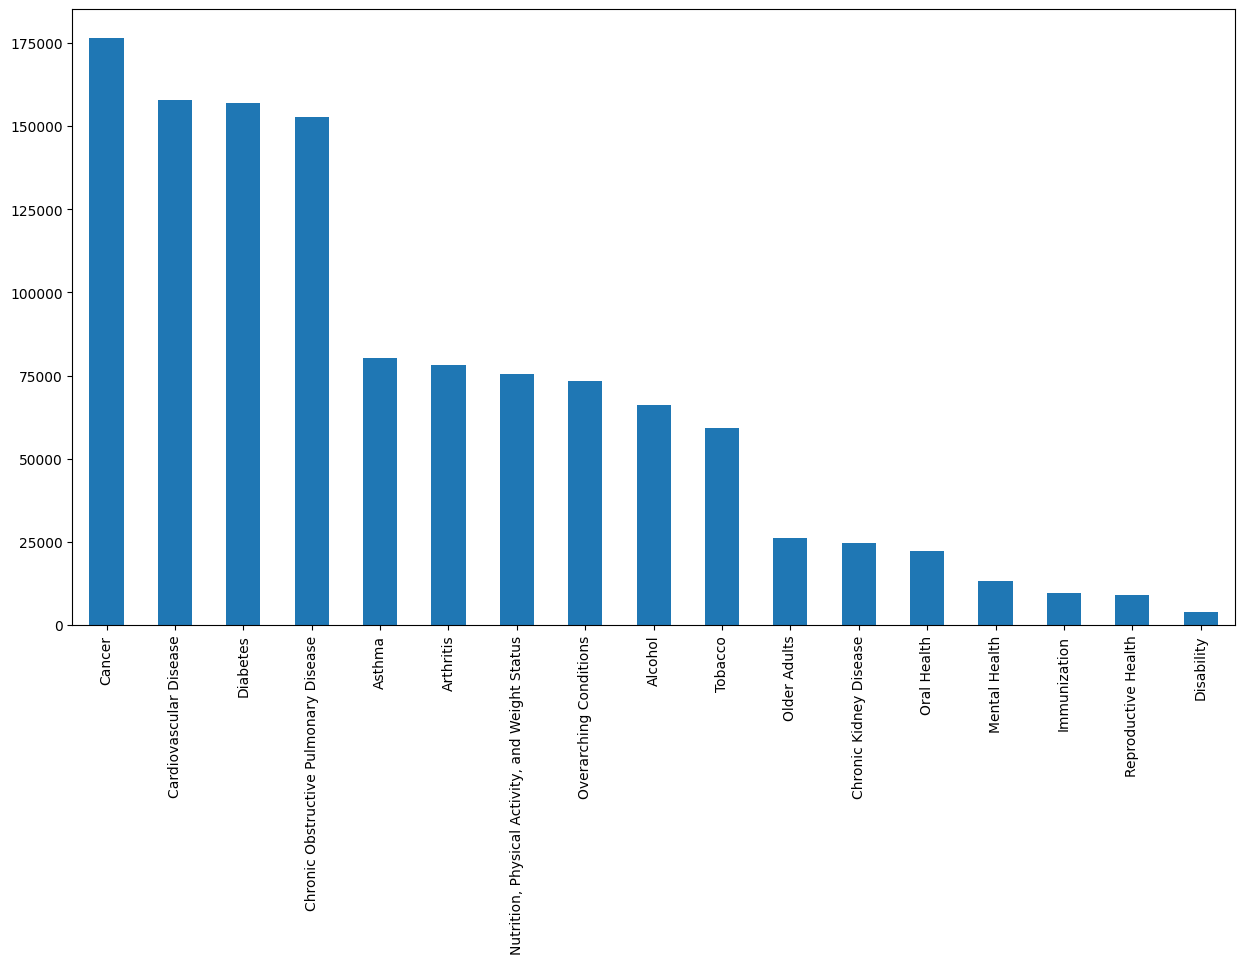

In [32]:
disease.topic.value_counts().plot(kind = 'bar', figsize=(15,8))

<Axes: xlabel='yearstart'>

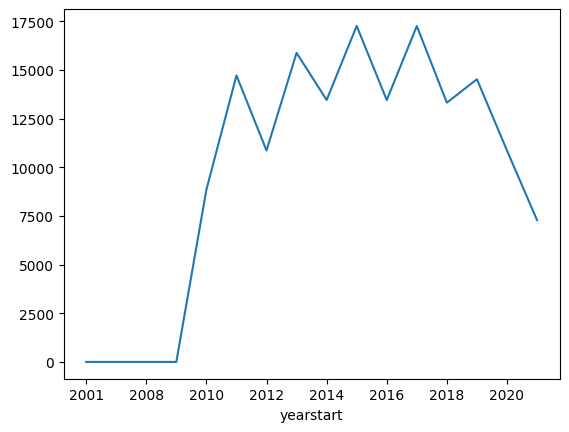

In [63]:
cvd = disease[['yearstart','topic']].pivot_table(index = 'yearstart', columns = 'topic', values = 'yearstart', aggfunc= 'value_counts').fillna(0)
cvd['Cardiovascular Disease'].plot()

In [39]:
heart_disease = disease[disease['topic'] == 'Cardiovascular Disease']

<Axes: >

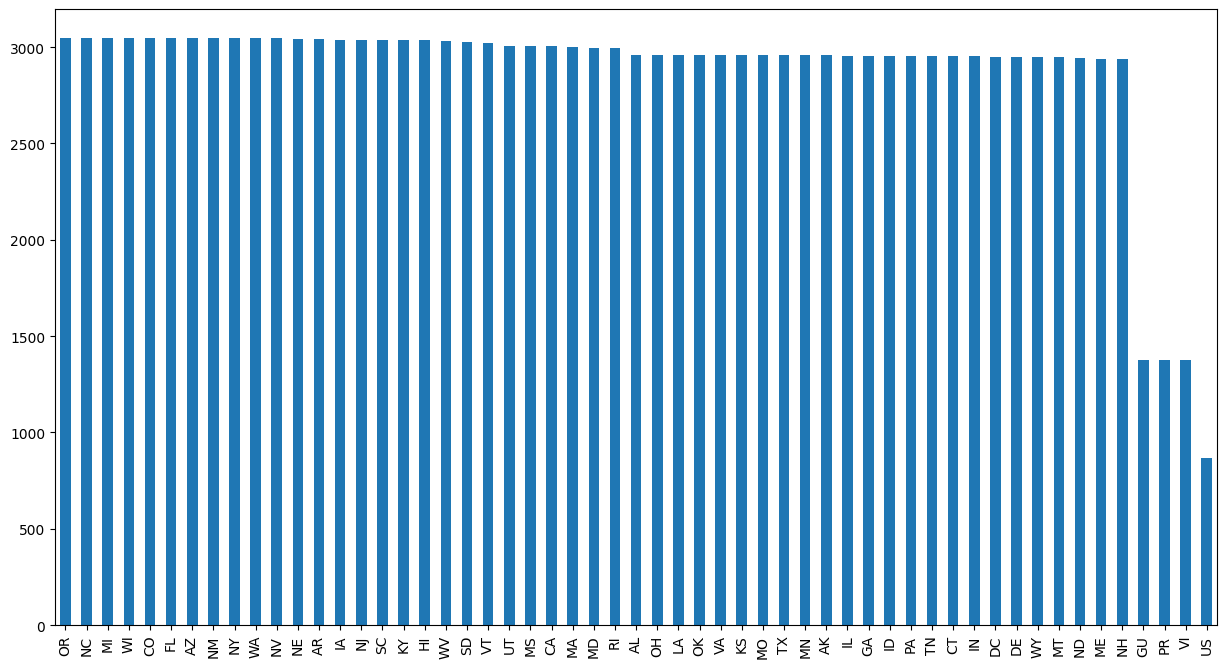

In [43]:
heart_disease.locationabbr.value_counts().plot(kind = 'bar', figsize=(15,8))

In [ ]:
heart = pd.read_csv('heart.csv')    # Importing heart dataset

In [ ]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
disease = disease[disease['Topic'] == "Cardiovascular Disease"]

In [ ]:
disease = disease[disease['StratificationCategoryID1'] == 'GENDER' ]

In [ ]:
pd.options.display.max_columns =100
disease

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
133,2012,2012,MA,Massachusetts,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,2671,2671.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,POINT (-72.08269067499964 42.27687047000046),NaN,25,CVD,CVD1_4,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
134,2014,2014,MD,Maryland,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,2048,2048.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,POINT (-76.60926011099963 39.29058096400047),NaN,24,CVD,CVD1_4,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
135,2014,2014,MS,Mississippi,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,2397,2397.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,POINT (-89.53803082499968 32.745510099000455),NaN,28,CVD,CVD1_4,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
136,2011,2011,SD,South Dakota,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,432,432.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,POINT (-100.3735306369997 44.353130053000484),NaN,46,CVD,CVD1_4,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
137,2018,2018,VA,Virginia,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,4234,4234.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,POINT (-78.45789046299967 37.54268067400045),NaN,51,CVD,CVD1_4,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184827,2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,NaN,%,Crude Prevalence,78.3,78.3,NaN,NaN,62.4,88.7,Gender,Female,NaN,NaN,NaN,NaN,POINT (-108.10983035299967 43.23554134300048),NaN,56,CVD,CVD10_2,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
1185103,2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,NaN,%,Crude Prevalence,NaN,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,POINT (-108.10983035299967 43.23554134300048),NaN,56,CVD,CVD10_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
1185124,2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,NaN,%,Age-adjusted Prevalence,67.9,67.9,NaN,NaN,57.1,77.0,Gender,Male,NaN,NaN,NaN,NaN,POINT (-108.10983035299967 43.23554134300048),NaN,56,CVD,CVD9_2,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
1185172,2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,NaN,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,POINT (-108.10983035299967 43.23554134300048),NaN,56,CVD,CVD9_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
del stroke['id']

In [ ]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
heart.duplicated().sum()

0

In [ ]:
stroke.duplicated().sum()

0

In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print('The heart dataset shape : ',heart.shape)

The heart shape :  (918, 12)


In [ ]:
print('The stroke dataset shape : ', stroke.shape)

The stroke dataset shape :  (5110, 11)


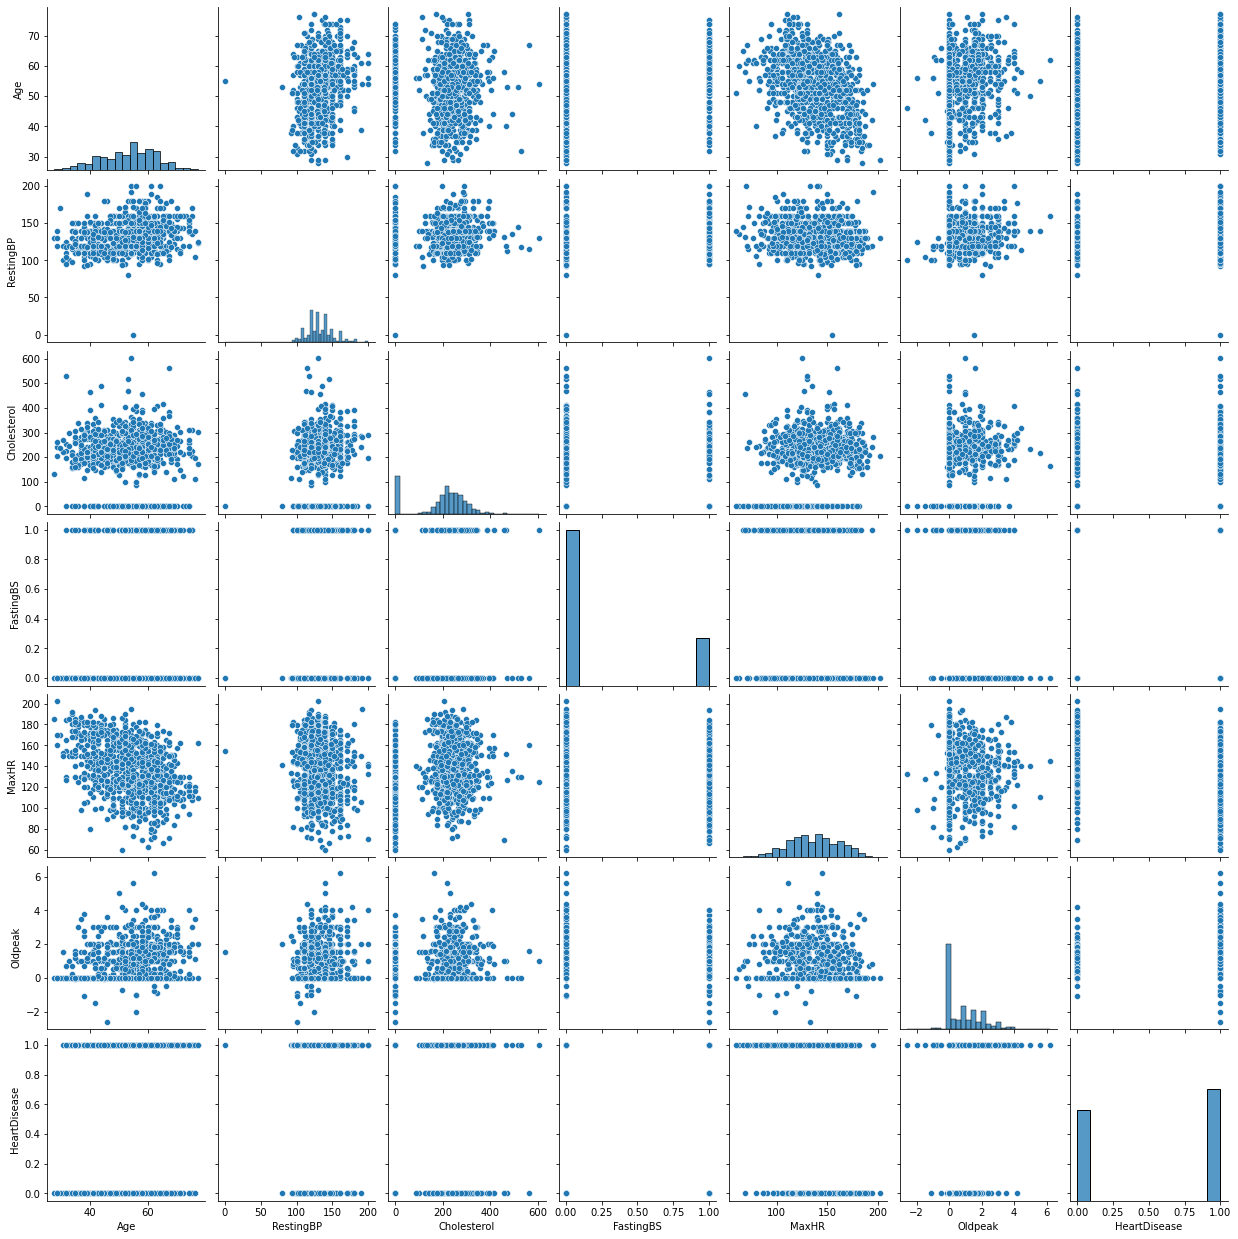

In [ ]:
sns.pairplot(heart)

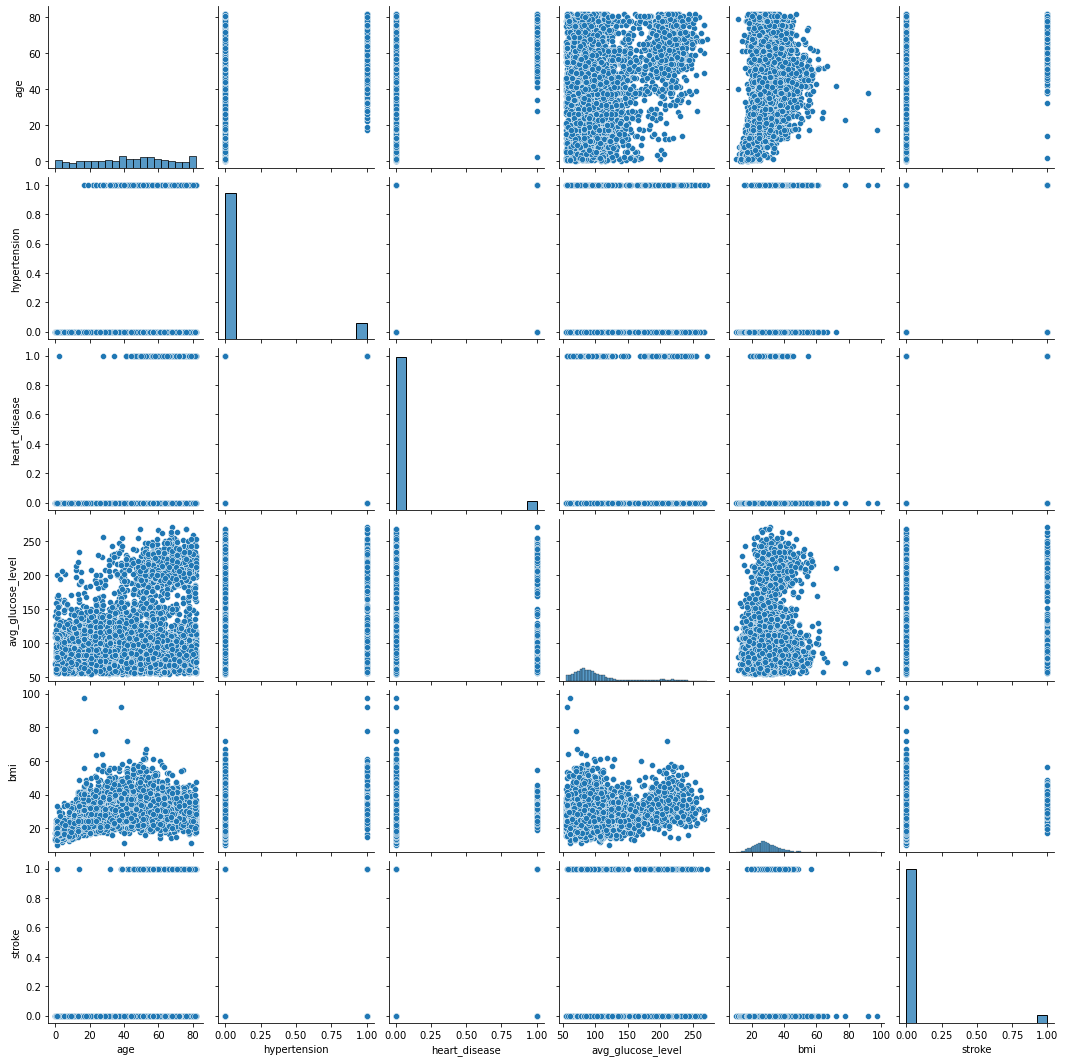

In [ ]:
sns.pairplot(stroke)